# Python analysis of output from MATLAB CNMF-E implementation

Analyze tif stacks using `batch_cnmf.py` and then open the resultant analysis products using a workflow like the one shown below.

These results were generated using the command:
```
python batch_cnmf.py '/home/deisseroth/Data/Test2/'
```

Contours are plotted using a function from Caiman: https://github.com/flatironinstitute/CaImAn.

Generally, Caiman analysis functions can be mostly used with results generated from `batch_cnmf.py`.

In [1]:
import sys
import os

from matplotlib import pyplot as plt
import scipy.sparse as sparse
import scipy.io as sio
import numpy as np

import python_utils as utils

%matplotlib inline

# First load up all `out.mat` files that CNMF-E generated

In [2]:
# What was the base directory where we ran the batch analysis?
base_path = '/home/deisseroth/Data/Test2/'

In [3]:
# Load up all processed files found in base directory
results_files = []  # Loaded mat files containing CNMF-E output
results_names = []  # Name of folders where results were saved
for root, dirs, files in os.walk(base_path):
        if 'out.mat' in files:
            idx = len(base_path.split(os.sep))
            name = root.split(os.sep)[idx]
            results_files.append(sio.loadmat(root + os.sep + 'out.mat'))
            results_names.append(name)
            print(name)

blood_vessel_10Hz_source_extraction


# Then let's plot all the results

All of our results are stored in the `out.mat` file that we loaded above into a dictionary stored within a list called `results_files`.

The most relevant keys in each `results` dictionary are:
- `A` -- Sparse matrix of spatial filters (e.g. for use plotting contours below)
- `S` -- Deconvolved spike trains estimated for each neuron
- `C` -- Denoised calcium signals computed for each neuron
- `C_raw` -- Raw calcium signals extracted from each neuron
- `file` -- File that was analyzed to generate this results file

Now that we've loaded it we can look at the results of our analysis as illustrated below.

In [4]:
# Look at the path of the first loaded results file
print(results_names[0], results_files[0]['file'])

blood_vessel_10Hz_source_extraction ['/home/deisseroth/Data/Test2/Data/blood_vessel_10Hz.mat']


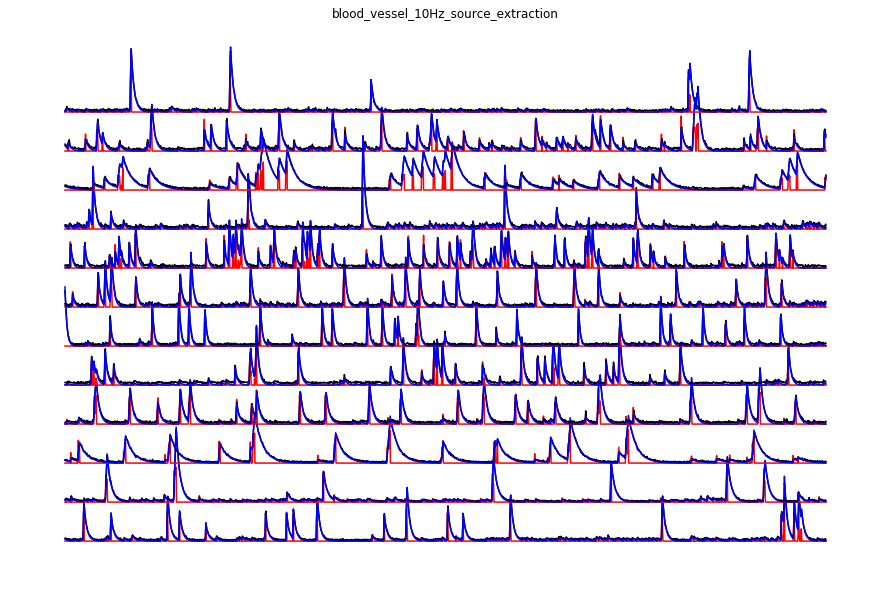

In [5]:
# Neurons to plot
neurons_idx = 10

# Frames to plot
frames = 2000

# Make a plot showing some time series traces
for name, results in zip(results_names, results_files):
        plt.figure(figsize=(15,10))
        plt.title(name)
        plt.axis('off')
        
        S = np.array(results['S'].todense())  # Inferred spikes
        C = np.array(results['C'])  # Denoised fluorescence
        F = np.array(results['C_raw'])  # Raw fluorescence
        
        for idx in range(np.shape(F)[0]):
            plt.plot(utils.normalize(S[idx, :frames], percentile=False) + idx, 'r')
            plt.plot(utils.normalize(F[idx, :frames]) + idx, 'k')
            plt.plot(utils.normalize(C[idx, :frames]) + idx, 'b')
            if idx > neurons_idx:
                break

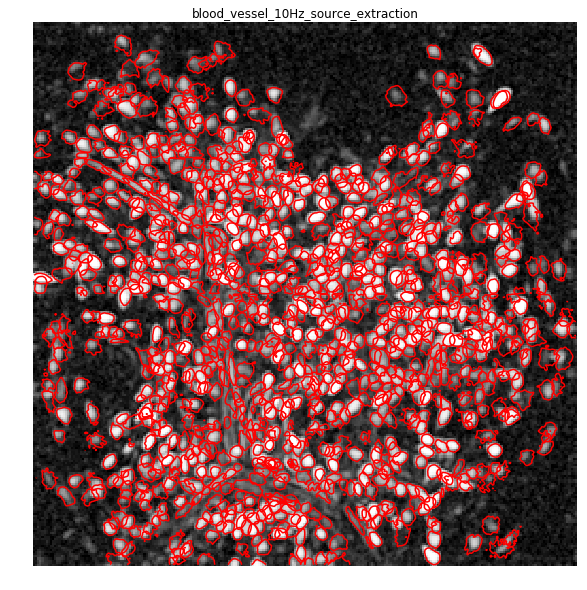

In [6]:
# Make a plot showing contours from each dataset
for name, results in zip(results_names, results_files):
    plt.figure(figsize=(10,10))
    
    # Call contour plotting function from Caiman (with our results from MATLAB!)
    coordinates = utils.plot_contours(results['A'].todense(), 
                                      results['Cn'],
                                      display_numbers=False, maxthr=.6,
                                      cmap='gray', colors='r')
    plt.title(name)
    plt.axis('off')